# Intrusion Detection System

In [1]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading DATA

In [2]:
network_data = pd.read_csv('03-02-2018.csv')
network_data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


### check the number of rows and columns

In [3]:

print('Number of Rows (Samples): %s' % str((network_data.shape[0])))
print('Number of Columns (Features): %s' % str((network_data.shape[1])))

Number of Rows (Samples): 1048575
Number of Columns (Features): 80


In [4]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [5]:
network_data['Label'].value_counts()

Benign    762384
Bot       286191
Name: Label, dtype: int64

### Data Preprocessing

In [6]:
network_data = network_data.replace([np.inf, -np.inf], np.nan)
network_data.isna().sum().to_numpy()

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 4050, 4050,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int64)

In [7]:
cleaned_data = network_data.dropna()
cleaned_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
data1 = cleaned_data[cleaned_data['Label'] == "Benign"]
data2 = cleaned_data[cleaned_data['Label'] == "Bot"]

In [9]:
data1_resample = resample(data1, n_samples=20000, random_state=123, replace=True)
data2_resample = resample(data2, n_samples=20000, random_state=123, replace=True)

In [10]:
data_resample = pd.concat([data1_resample, data2_resample])
data_resample.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
565659,53,17,02/03/2018 01:48:14,1328,1,1,28,241.0,28,28,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
161323,53,17,02/03/2018 09:27:46,1929,1,1,35,65.0,35,35,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
89896,3389,6,02/03/2018 04:20:08,2215395,8,7,1144,1581.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
479717,53,17,02/03/2018 04:16:42,271,1,1,51,147.0,51,51,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
481527,6245,6,02/03/2018 01:54:57,86044120,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,86000000.0,0.0,86000000.0,86000000.0,Benign


In [11]:
data_resample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 565659 to 112433
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           40000 non-null  int64  
 1   Protocol           40000 non-null  int64  
 2   Timestamp          40000 non-null  object 
 3   Flow Duration      40000 non-null  int64  
 4   Tot Fwd Pkts       40000 non-null  int64  
 5   Tot Bwd Pkts       40000 non-null  int64  
 6   TotLen Fwd Pkts    40000 non-null  int64  
 7   TotLen Bwd Pkts    40000 non-null  float64
 8   Fwd Pkt Len Max    40000 non-null  int64  
 9   Fwd Pkt Len Min    40000 non-null  int64  
 10  Fwd Pkt Len Mean   40000 non-null  float64
 11  Fwd Pkt Len Std    40000 non-null  float64
 12  Bwd Pkt Len Max    40000 non-null  int64  
 13  Bwd Pkt Len Min    40000 non-null  int64  
 14  Bwd Pkt Len Mean   40000 non-null  float64
 15  Bwd Pkt Len Std    40000 non-null  float64
 16  Flow Byts/s     

### Scaling of Attributes

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data_resample.select_dtypes(include=['float64','int64']).columns

scale_sample = scaler.fit_transform(data_resample.select_dtypes(include=['float64','int64']))


#trun back result to dataframe
scale_sampledf = pd.DataFrame(scale_sample, columns=cols)
scale_sampledf.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.655810,2.554242,-0.311302,-0.128261,-0.054438,-0.102957,-0.024720,-0.689708,1.112935,-0.452492,...,-0.163157,-2.321256,-0.051093,-0.039028,-0.057229,-0.042872,-0.226706,-0.061512,-0.228711,-0.222511
1,-0.655810,2.554242,-0.311278,-0.128261,-0.054438,-0.100564,-0.026532,-0.660775,1.461829,-0.330939,...,-0.163157,-2.321256,-0.051093,-0.039028,-0.057229,-0.042872,-0.226706,-0.061512,-0.228711,-0.222511
2,-0.396213,-0.366242,-0.224734,0.117584,0.032492,0.278656,-0.010926,1.992714,-0.282640,1.544443,...,0.341449,0.389832,-0.051093,-0.039028,-0.057229,-0.042872,-0.226706,-0.061512,-0.228711,-0.222511
3,-0.655810,2.554242,-0.311343,-0.128261,-0.054438,-0.095092,-0.025688,-0.594645,2.259300,-0.053105,...,-0.163157,-2.321256,-0.051093,-0.039028,-0.057229,-0.042872,-0.226706,-0.061512,-0.228711,-0.222511
4,-0.173968,-0.366242,3.052893,-0.093140,-0.068926,-0.112532,-0.027202,-0.805436,-0.282640,-0.938702,...,-0.163157,0.389832,-0.051093,-0.039028,-0.057229,-0.042872,5.597413,-0.061512,5.534070,5.634058


In [13]:
encoder = LabelEncoder()

# extract categorical attributes from sample sets 
cate_sample = data_resample.select_dtypes(include=['object']).copy()
object_cols = data_resample.select_dtypes(include=['object']).columns

# encode the categorical attributes
sample_cate = cate_sample.apply(encoder.fit_transform)

# separate target column from encoded data
enc_Objects = pd.DataFrame(sample_cate, columns=object_cols)
cat_Ysample = enc_Objects[['Label']].copy()
print(cat_Ysample.shape)

(40000, 1)


In [14]:

sample_x = scale_sampledf
#sample_x = pd.concat([new_scale_sampledf, new_enc_Sample], axis=1)
#sample_x = np.any(np.isnan(sample_x)) 
sample_y = cat_Ysample['Label']
sample_y.head

<bound method NDFrame.head of 565659    0
161323    0
89896     0
479717    0
481527    0
         ..
230295    1
337095    1
73532     1
218085    1
112433    1
Name: Label, Length: 40000, dtype: int32>

### Feature Selction

['Dst Port',
 'Flow Duration',
 'TotLen Bwd Pkts',
 'Bwd Pkt Len Mean',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Max',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Fwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Std',
 'ECE Flag Cnt',
 'Pkt Size Avg',
 'Bwd Seg Size Avg',
 'Init Fwd Win Byts']

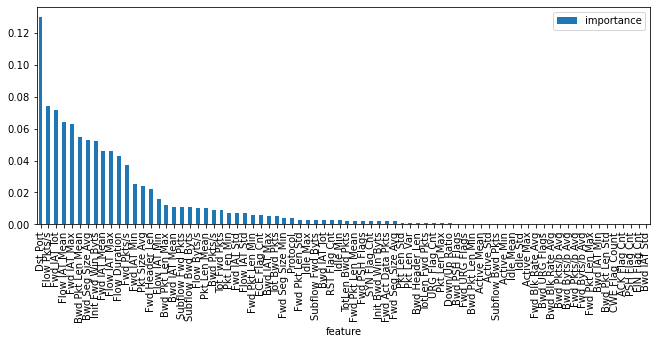

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier();

# Random Forest Classifier on trainData
rfc.fit(sample_x, sample_y);

# extract important features
score = np.round(rfc.feature_importances_,3)
important_feat = pd.DataFrame({'feature':sample_x.columns,'importance':score})
important_feature = important_feat.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
important_feature.plot.bar();

# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(sample_x, sample_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), sample_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

In [16]:
smaple_X = pd.DataFrame(sample_x, columns=selected_features)
smaple_X.head()

,Dst Port,Flow Duration,TotLen Bwd Pkts,Bwd Pkt Len Mean,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Max,Fwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Std,ECE Flag Cnt,Pkt Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts
0,-0.655810,-0.311302,-0.024720,1.126616,0.012041,-0.091167,-0.210225,-0.273382,-0.305417,-0.220548,-0.267993,-0.198080,-0.151575,-0.089405,-0.031699,0.192398,-0.713268,0.811598,1.126616,-0.590441
1,-0.655810,-0.311278,-0.026532,-0.081919,-0.030750,-0.094448,-0.210183,-0.273345,-0.305417,-0.220548,-0.267993,-0.198080,-0.151575,-0.091151,-0.038963,-0.604172,-0.713268,-0.005173,-0.081919,-0.590441
2,-0.396213,-0.224734,-0.010926,1.022635,-0.045119,-0.101650,-0.199241,-0.214695,-0.218450,-0.198483,-0.193973,-0.198079,0.134670,-0.094982,-0.054916,1.673329,1.401998,1.146037,1.022635,0.166838
3,-0.655810,-0.311343,-0.025688,0.481148,0.161967,-0.050091,-0.210299,-0.273447,-0.305417,-0.220548,-0.267993,-0.198080,-0.151575,-0.067548,0.059240,-0.316885,-0.713268,0.569592,0.481148,-0.590441
4,-0.173968,3.052893,-0.027202,-0.528252,-0.045469,-0.101698,5.809360,5.028961,3.070593,5.775490,5.068936,5.807404,-0.095722,-0.095009,-0.055014,-0.734758,-0.713268,-0.685815,-0.528252,5.192074


### Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(smaple_X,sample_y,train_size=0.70, random_state=2)

### Fitting Model

In [21]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Train with LogisticRegression model
lgr_model = LogisticRegression(n_jobs=-1, random_state=0)
lgr_model.fit(X_train,Y_train)

#Train with Gussain Nave Baye model
bnb_model = BernoulliNB()
bnb_model.fit(X_train, Y_train)

BernoulliNB()

### Vaildating Model

In [22]:
from sklearn import metrics

models = []
models.append(('Naive Baye', bnb_model))
models.append(('LogisticRegression', lgr_model))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Model Evaluation ==============================

Cross Validation Mean Score:
 0.9305357142857144

Model Accuracy:
 0.9306071428571429

Confusion matrix:
 [[12313  1696]
 [  247 13744]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     14009
           1       0.89      0.98      0.93     13991

    accuracy                           0.93     28000
   macro avg       0.94      0.93      0.93     28000
weighted avg       0.94      0.93      0.93     28000



============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9684999999999999

Model Accuracy:
 0.9713214285714286

Confusion matrix:
 [[13223   786]
 [   17 13974]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     14009
           1       0.95      1.00      0.97    

### Evaluating Model

In [23]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()    


============================== Naive Baye Model Test Results ==============================

Model Accuracy:
 0.9380833333333334

Confusion matrix:
 [[5341  650]
 [  93 5916]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      5991
           1       0.90      0.98      0.94      6009

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9746666666666667

Confusion matrix:
 [[5692  299]
 [   5 6004]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      5991
           1       0.95      1.00      0.98      6009

    accuracy                           0.97     12000
   macro avg       0.98      0.97      0.9